# CO2 Emissions prediction

## The problem that I am going to solve here is that given a set of attributes from different car models on CO2 emission in Canada

##### In this dataset, each row describes a boston town or suburb. There are 7385 rows and 12 attributes (features) with a target column (CO2 emission).
https://github.com/SumuduTennakoon/MachineLearningFoundations/blob/main/Datasets/daily_bike_rental.csv

In [1]:
# Importing the libraries 
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import warnings
%matplotlib inline

In [2]:
# Importing the Boston Housing dataset
file_path = 'CO2 Emissions_Canada.csv'
# Read the CSV file into a pandas DataFrame
data = pd.read_csv(file_path)

In [3]:
# See head of the dataset
data.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [4]:
#Get the shape 
print(data.shape)

(7385, 12)


In [5]:
#Adding the feature names to the dataframe
print(data.columns)

Index(['Make', 'Model', 'Vehicle Class', 'Engine Size(L)', 'Cylinders',
       'Transmission', 'Fuel Type', 'Fuel Consumption City (L/100 km)',
       'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
       'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)'],
      dtype='object')


In [6]:
#Adding target variable to dataframe
print(data['CO2 Emissions(g/km)'] )
# Median value of owner-occupied homes in $1000s

0       196
1       221
2       136
3       255
4       244
       ... 
7380    219
7381    232
7382    240
7383    232
7384    248
Name: CO2 Emissions(g/km), Length: 7385, dtype: int64


In [7]:
#Check the shape of dataframe
data.shape

(7385, 12)

In [8]:
data.dtypes

Make                                 object
Model                                object
Vehicle Class                        object
Engine Size(L)                      float64
Cylinders                             int64
Transmission                         object
Fuel Type                            object
Fuel Consumption City (L/100 km)    float64
Fuel Consumption Hwy (L/100 km)     float64
Fuel Consumption Comb (L/100 km)    float64
Fuel Consumption Comb (mpg)           int64
CO2 Emissions(g/km)                   int64
dtype: object

In [9]:
# Identifying the unique number of values in the dataset
data.nunique()

Make                                  42
Model                               2053
Vehicle Class                         16
Engine Size(L)                        51
Cylinders                              8
Transmission                          27
Fuel Type                              5
Fuel Consumption City (L/100 km)     211
Fuel Consumption Hwy (L/100 km)      143
Fuel Consumption Comb (L/100 km)     181
Fuel Consumption Comb (mpg)           54
CO2 Emissions(g/km)                  331
dtype: int64

In [10]:
# Check for missing values
data.isnull().sum()

Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64

In [11]:
# See rows with missing values
data[data.isnull().any(axis=1)]

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)


In [12]:
# Viewing the data statistics
data.describe()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
count,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000
mean,3.160068,5.615030,12.556534,9.041706,10.975071,27.481652,250.584699
std,1.354170,1.828307,3.500274,2.224456,2.892506,7.231879,58.512679
min,0.900000,3.000000,4.200000,4.000000,4.100000,11.000000,96.000000
25%,2.000000,4.000000,10.100000,7.500000,8.900000,22.000000,208.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,27.000000,246.000000
75%,3.700000,6.000000,14.600000,10.200000,12.600000,32.000000,288.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,69.000000,522.000000


In [13]:
#Dropping duplicate rows
duplicate_rows_df = data[data.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (1103, 12)


In [14]:
data = data.drop_duplicates()
print(data.shape)

(6282, 12)


In [15]:
#Rename the columns
data = data.rename(columns={"Vehicle Class": "VC", "Engine Size(L)": "EC", 
                            "Transmission": "T", "Fuel Type": "FT",
                            "Fuel Consumption City (L/100 km)": "FC-C",
                            "Fuel Consumption Hwy (L/100 km)": "FC-H",
                            "Fuel Consumption Comb (L/100 km)": "FC-Comb",
                            "Fuel Consumption Comb (mpg)": "FC-Comb-mpg",
                            "CO2 Emissions(g/km)": "CO2"})
data.head(5)

,Make,Model,VC,EC,Cylinders,T,FT,FC-C,FC-H,FC-Comb,FC-Comb-mpg,CO2
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


<Axes: xlabel='CO2'>

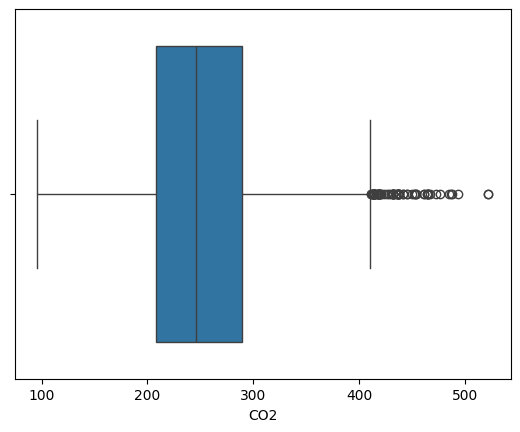

In [16]:
#Detecting outliers 
sns.boxplot(x=data['CO2'])

In [17]:
from scipy.stats import zscore
# Calculate z-scores for the selected column
z_scores = zscore(data["CO2"])

# Set a threshold for outliers (e.g., z-score greater than 3 or less than -3)
threshold = 3

# Filter the DataFrame to remove outliers based on the z-score
df_no_outliers = data[(abs(z_scores) < threshold)]

# Display the new DataFrame without outliers
print(df_no_outliers)

       Make        Model              VC   EC  Cylinders    T FT  FC-C  FC-H  \
0     ACURA          ILX         COMPACT  2.0          4  AS5  Z   9.9   6.7   
1     ACURA          ILX         COMPACT  2.4          4   M6  Z  11.2   7.7   
2     ACURA   ILX HYBRID         COMPACT  1.5          4  AV7  Z   6.0   5.8   
3     ACURA      MDX 4WD     SUV - SMALL  3.5          6  AS6  Z  12.7   9.1   
4     ACURA      RDX AWD     SUV - SMALL  3.5          6  AS6  Z  12.1   8.7   
...     ...          ...             ...  ...        ...  ... ..   ...   ...   
7380  VOLVO  XC40 T5 AWD     SUV - SMALL  2.0          4  AS8  Z  10.7   7.7   
7381  VOLVO  XC60 T5 AWD     SUV - SMALL  2.0          4  AS8  Z  11.2   8.3   
7382  VOLVO  XC60 T6 AWD     SUV - SMALL  2.0          4  AS8  Z  11.7   8.6   
7383  VOLVO  XC90 T5 AWD  SUV - STANDARD  2.0          4  AS8  Z  11.2   8.3   
7384  VOLVO  XC90 T6 AWD  SUV - STANDARD  2.0          4  AS8  Z  12.2   8.7   

      FC-Comb  FC-Comb-mpg  CO2  
0    

<Axes: xlabel='CO2'>

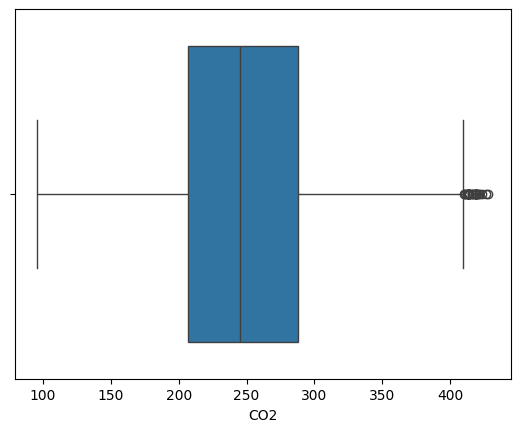

In [18]:
#Detecting outliers 
sns.boxplot(x=df_no_outliers['CO2'])

In [19]:
df_no_outliers.dtypes

Make            object
Model           object
VC              object
EC             float64
Cylinders        int64
T               object
FT              object
FC-C           float64
FC-H           float64
FC-Comb        float64
FC-Comb-mpg      int64
CO2              int64
dtype: object

Index(['EC', 'Cylinders', 'FC-C', 'FC-H', 'FC-Comb', 'FC-Comb-mpg', 'CO2'], dtype='object')
EC
Cylinders
FC-C
FC-H
FC-Comb
FC-Comb-mpg
CO2


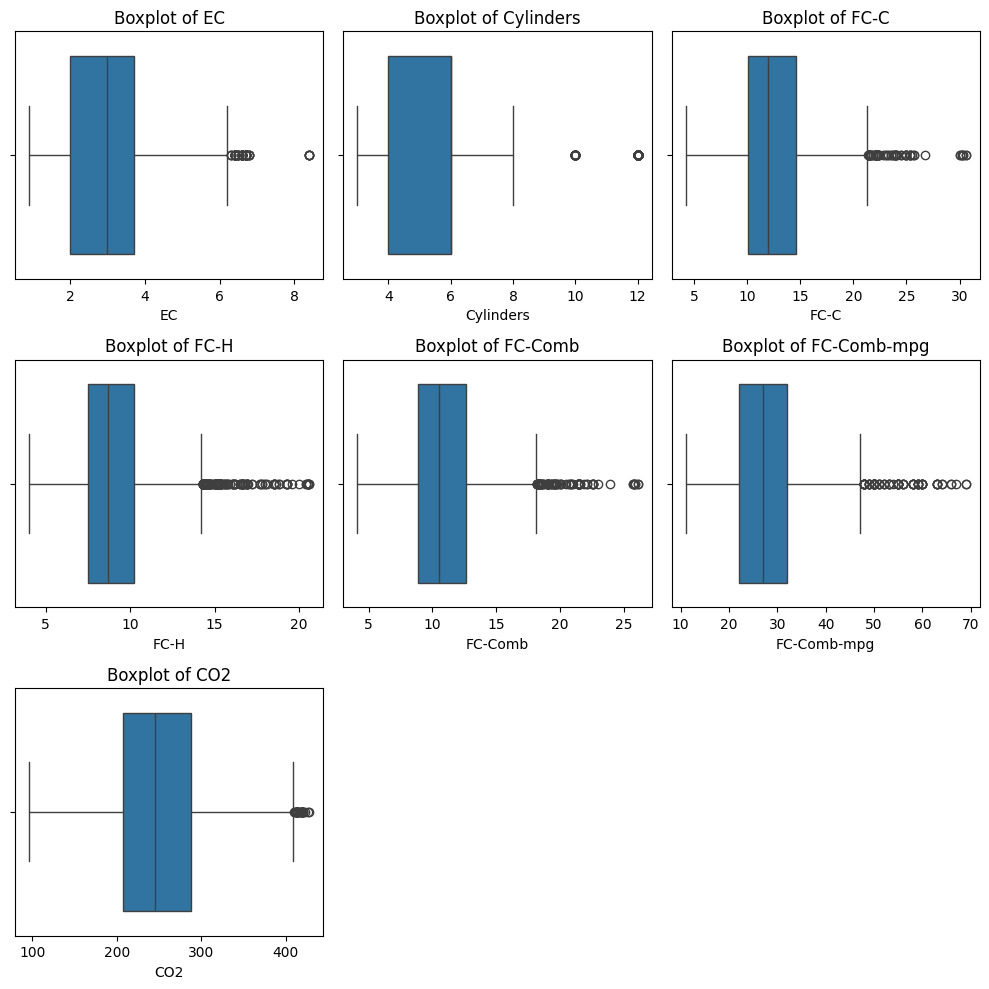

In [20]:
# Select only numerical columns
numerical_columns = df_no_outliers.select_dtypes(include=['float64', 'int64']).columns
print(numerical_columns )
# Set up the grid for boxplot visualization
num_cols = 3  # Number of columns in the grid
num_rows = 3 

# Create a grid of boxplots using Seaborn
plt.figure(figsize=(10, 10))  # Adjust figure size as needed

for i, column in enumerate(numerical_columns):
    if i>7:
        break
    print(column)
    plt.subplot(num_rows, num_cols, i + 1)
    sns.boxplot(x=df_no_outliers[column])
    plt.title(f'Boxplot of {column}')
    plt.tight_layout()

plt.show()

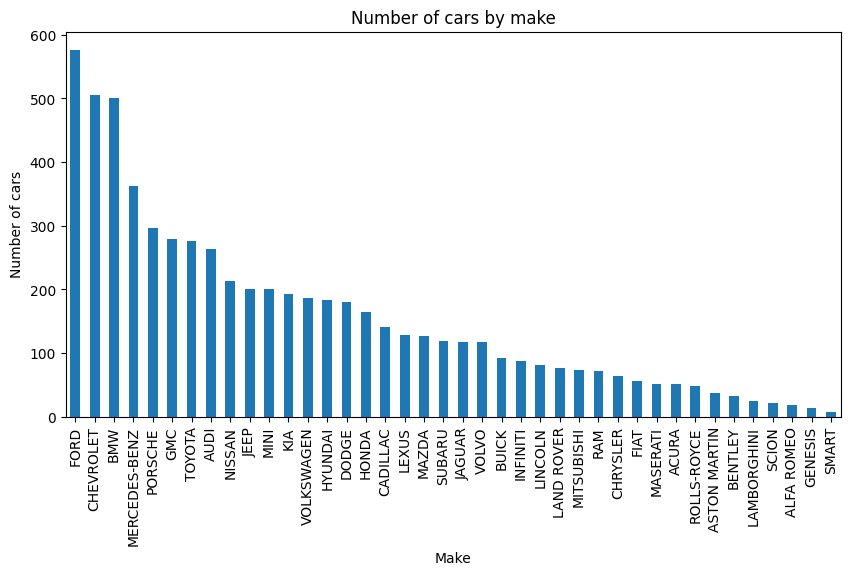

In [21]:
df_no_outliers.Make.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("Number of cars by make")
plt.ylabel('Number of cars')
plt.xlabel('Make');

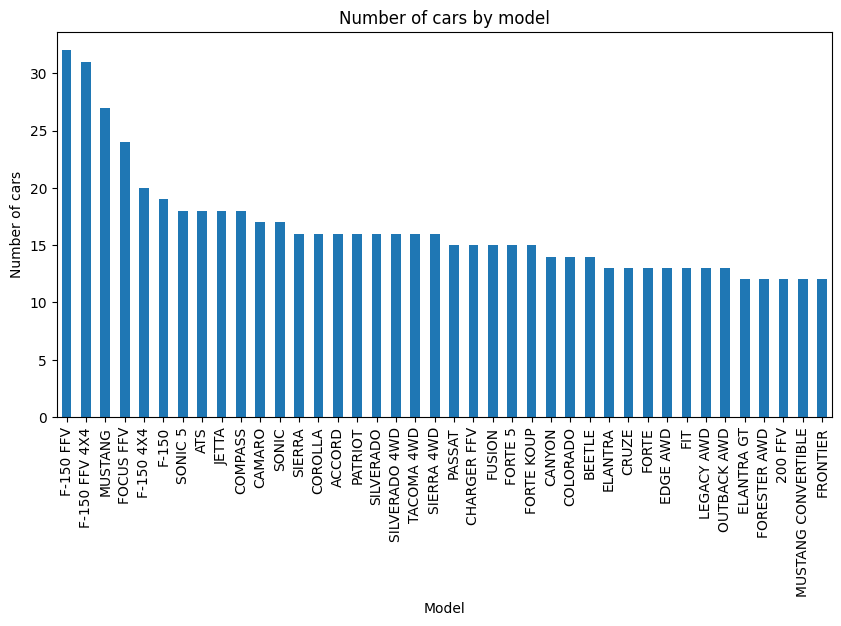

In [22]:
data.Model.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("Number of cars by model")
plt.ylabel('Number of cars')
plt.xlabel('Model');

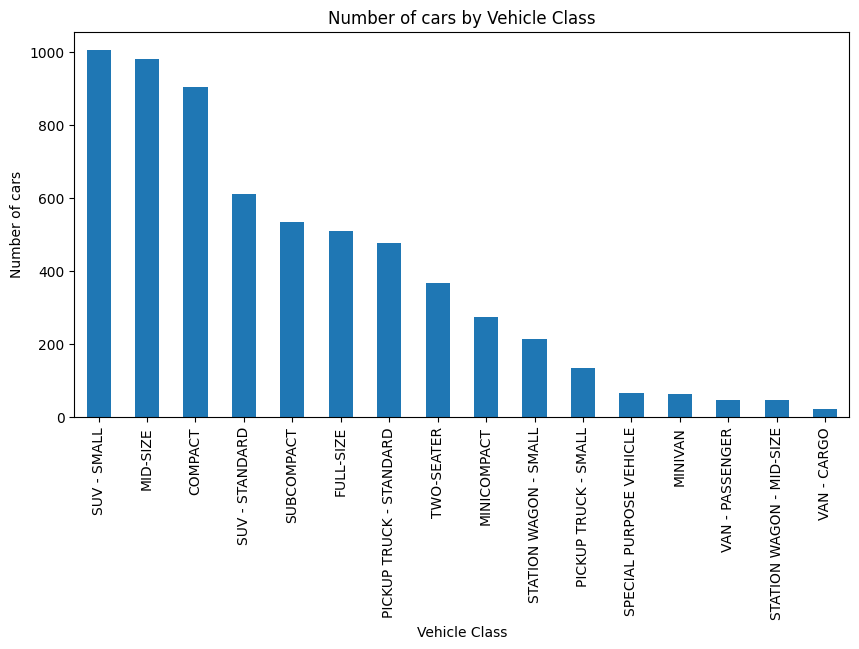

In [23]:
df_no_outliers.VC.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("Number of cars by Vehicle Class")
plt.ylabel('Number of cars')
plt.xlabel('Vehicle Class');

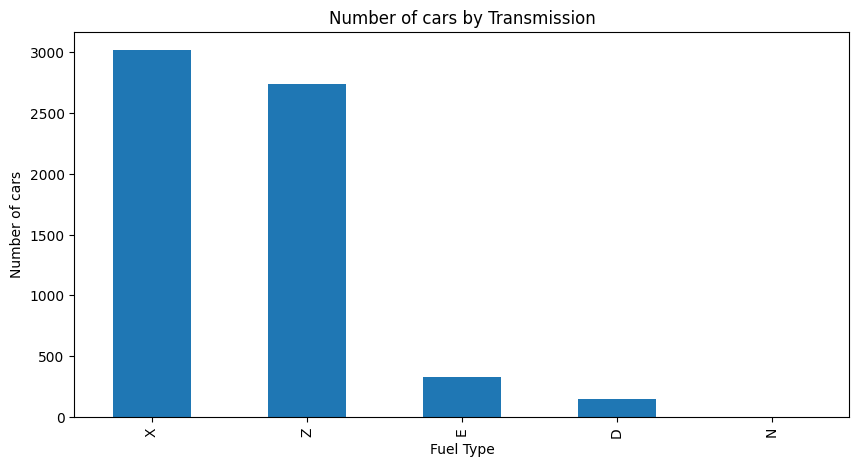

In [24]:
df_no_outliers.FT.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("Number of cars by Transmission")
plt.ylabel('Number of cars')
plt.xlabel('Fuel Type');

In [25]:
#Get Categorical columns
categorical_columns = df_no_outliers.select_dtypes(include=['object', 'category']).columns.tolist()
print(categorical_columns)

['Make', 'Model', 'VC', 'T', 'FT']


In [26]:

import pickle

# To suppress DeprecationWarnings
warnings.filterwarnings('ignore', category=DeprecationWarning)
# Initialize LabelEncoder
label_encoders = {}

# Label encode categorical columns
for col in categorical_columns:
    if col in df_no_outliers.columns:
        label_encoder = LabelEncoder()
        df_no_outliers[col] = label_encoder.fit_transform(df_no_outliers[col])
        label_encoders[col] = label_encoder  # Store the LabelEncoder for each column

# Save the label encoders to a file using pickle
with open('label_encoders.pkl', 'wb') as file:
    pickle.dump(label_encoders, file)

/tmp/ipykernel_49469/1470160318.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers[col] = label_encoder.fit_transform(df_no_outliers[col])
/tmp/ipykernel_49469/1470160318.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers[col] = label_encoder.fit_transform(df_no_outliers[col])
/tmp/ipykernel_49469/1470160318.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cave

In [27]:
df_no_outliers.nunique()

Make             41
Model          2040
VC               16
EC               50
Cylinders         7
T                27
FT                5
FC-C            201
FC-H            141
FC-Comb         175
FC-Comb-mpg      54
CO2             309
dtype: int64

In [28]:
# Initialize MinMaxScaler for normalization
scaler = MinMaxScaler()

# Normalize numerical columns (if needed)
numerical_columns = df_no_outliers.select_dtypes(include=['float64', 'int64']).columns.tolist()
df_no_outliers[numerical_columns] = scaler.fit_transform(df_no_outliers[numerical_columns])
df_no_outliers.head()


/tmp/ipykernel_49469/2457887579.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers[numerical_columns] = scaler.fit_transform(df_no_outliers[numerical_columns])


,Make,Model,VC,EC,Cylinders,T,FT,FC-C,FC-H,FC-Comb,FC-Comb-mpg,CO2
0,0.0,0.512997,0.000000,0.146667,0.111111,0.538462,1.0,0.215909,0.162651,0.200000,0.379310,0.301205
1,0.0,0.512997,0.000000,0.200000,0.111111,0.961538,1.0,0.265152,0.222892,0.250000,0.310345,0.376506
2,0.0,0.513487,0.000000,0.080000,0.111111,0.846154,1.0,0.068182,0.108434,0.081818,0.637931,0.120482
3,0.0,0.599313,0.733333,0.346667,0.333333,0.576923,1.0,0.321970,0.307229,0.318182,0.241379,0.478916
4,0.0,0.728789,0.733333,0.346667,0.333333,0.576923,1.0,0.299242,0.283133,0.295455,0.275862,0.445783


In [29]:
# Finding out the correlation between the features
corr = df_no_outliers.corr()
corr.shape

(12, 12)

In [30]:
print(df_no_outliers.corr())

                 Make     Model        VC        EC  Cylinders         T  \
Make         1.000000  0.027953 -0.024657 -0.142821  -0.160548  0.178881   
Model        0.027953  1.000000  0.212467  0.085522   0.067573 -0.028834   
VC          -0.024657  0.212467  1.000000  0.140891   0.100497 -0.155906   
EC          -0.142821  0.085522  0.140891  1.000000   0.929605 -0.312446   
Cylinders   -0.160548  0.067573  0.100497  0.929605   1.000000 -0.259981   
T            0.178881 -0.028834 -0.155906 -0.312446  -0.259981  1.000000   
FT           0.049135 -0.081371 -0.041382  0.046463   0.114271  0.225901   
FC-C        -0.201396  0.124691  0.239050  0.827661   0.794599 -0.338952   
FC-H        -0.128295  0.180239  0.327670  0.757864   0.708782 -0.351285   
FC-Comb     -0.178408  0.145655  0.272788  0.812871   0.773759 -0.347487   
FC-Comb-mpg  0.188335 -0.115580 -0.278370 -0.757091  -0.719883  0.323993   
CO2         -0.151019  0.128529  0.282044  0.850775   0.831160 -0.307540   

           

<Axes: >

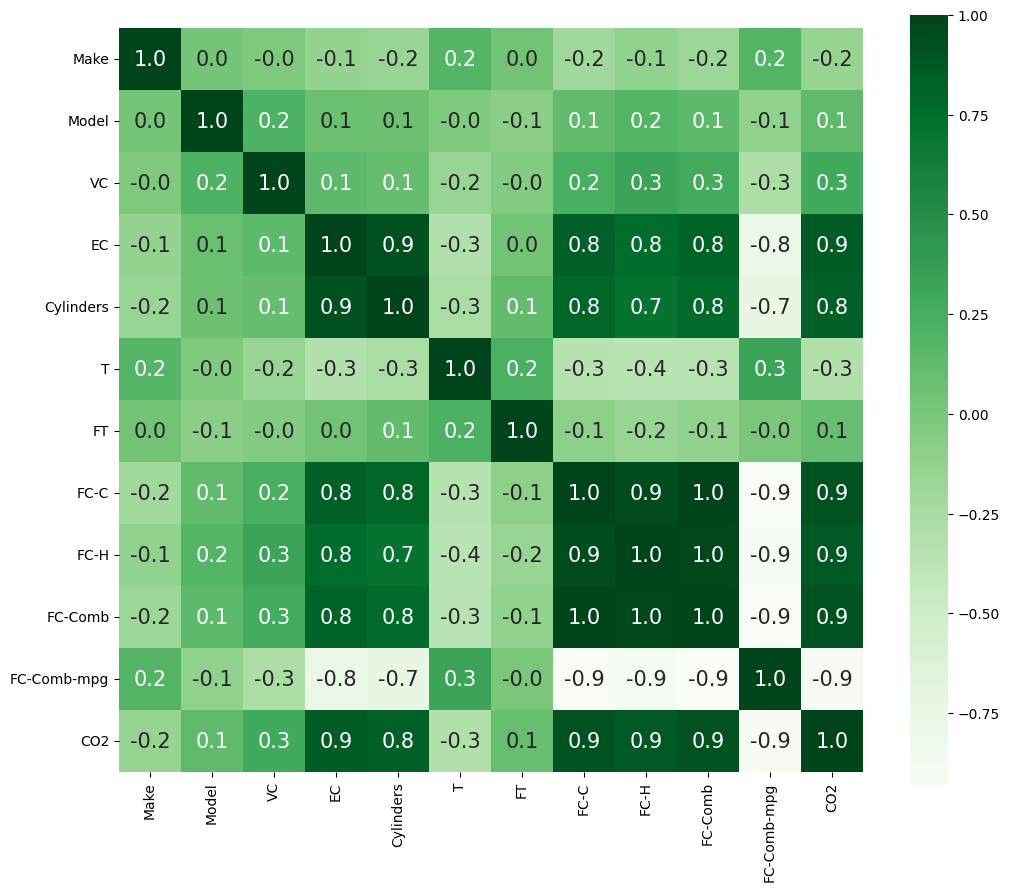

In [31]:
# Plotting the heatmap of correlation between features
plt.figure(figsize=(12,10))
sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='Greens')

In [32]:
#Display highly correlated features
correlation_matrix = df_no_outliers.corr()

# Set a threshold for identifying highly correlated features
threshold = 0.9  # Adjust this threshold as needed

# Find pairs of highly correlated features
highly_correlated_features = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            col_i = correlation_matrix.columns[i]
            col_j = correlation_matrix.columns[j]
            highly_correlated_features.add((col_i, col_j))

# Print pairs of highly correlated features
if len(highly_correlated_features) > 0:
    print("Pairs of Highly Correlated Features:")
    for pair in highly_correlated_features:
        print(pair)
else:
    print("No highly correlated features above the threshold.")


Pairs of Highly Correlated Features:
('FC-Comb', 'FC-C')
('FC-Comb', 'FC-H')
('FC-Comb-mpg', 'FC-Comb')
('CO2', 'FC-C')
('Cylinders', 'EC')
('CO2', 'FC-Comb-mpg')
('CO2', 'FC-Comb')
('FC-Comb-mpg', 'FC-C')
('FC-H', 'FC-C')


In [33]:
# Remove highly correlated features
correlation_matrix = df_no_outliers.corr()

# Set a threshold for identifying highly correlated features
threshold = 0.9  # Adjust this threshold as needed

# Find pairs of highly correlated features (excluding the target variable)
target_variable = 'CO2'  # Replace 'CO2' with the name of your target variable
highly_correlated_features = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold and correlation_matrix.columns[i] != target_variable and correlation_matrix.columns[j] != target_variable:
            col_i = correlation_matrix.columns[i]
            col_j = correlation_matrix.columns[j]
            highly_correlated_features.add((col_i, col_j))

# Remove one feature from each highly correlated pair (excluding the target variable)
for pair in highly_correlated_features:
    # Remove one feature from the pair (e.g., removing col_j)
    col_i, col_j = pair
    if col_i in df_no_outliers.columns and col_j in df_no_outliers.columns:
        if abs(correlation_matrix.loc[target_variable, col_i]) > abs(correlation_matrix.loc[target_variable, col_j]):
            df_no_outliers.drop(col_j, axis=1, inplace=True)
        else:
            df_no_outliers.drop(col_i, axis=1, inplace=True)


/tmp/ipykernel_49469/4245198110.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers.drop(col_i, axis=1, inplace=True)
/tmp/ipykernel_49469/4245198110.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers.drop(col_i, axis=1, inplace=True)
/tmp/ipykernel_49469/4245198110.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers.drop(col_i, axis=1, inplace=True)
/tmp/ipykernel_49469/4245198110.py:25

In [34]:
df_no_outliers.head()

,Make,Model,VC,EC,T,FT,FC-C,CO2
0,0.0,0.512997,0.000000,0.146667,0.538462,1.0,0.215909,0.301205
1,0.0,0.512997,0.000000,0.200000,0.961538,1.0,0.265152,0.376506
2,0.0,0.513487,0.000000,0.080000,0.846154,1.0,0.068182,0.120482
3,0.0,0.599313,0.733333,0.346667,0.576923,1.0,0.321970,0.478916
4,0.0,0.728789,0.733333,0.346667,0.576923,1.0,0.299242,0.445783


In [35]:
# Spliting target variable and independent variables
X = df_no_outliers.drop(['CO2'], axis = 1)
y = df_no_outliers['CO2']

In [36]:
# Splitting to training and testing data

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 4)

# Linear regression

#### Training the model

In [37]:
# Import library for Linear Regression
from sklearn.linear_model import LinearRegression

# Create a Linear regressor
lm = LinearRegression()

# Train the model using the training sets 
lm.fit(X_train, y_train)

LinearRegression()

In [38]:
# Value of y intercept
lm.intercept_

-0.012580763480391832

In [39]:
#Converting the coefficient values to a dataframe
coeffcients = pd.DataFrame([X_train.columns,lm.coef_]).T
coeffcients = coeffcients.rename(columns={0: 'Attribute', 1: 'Coefficients'})
coeffcients

,Attribute,Coefficients
0,Make,0.013337
1,Model,0.00783
2,VC,0.043472
3,EC,0.232522
4,T,-0.012097
5,FT,0.11287
6,FC-C,0.927925


#### Model Evaluation

In [40]:
# Model prediction on train data
y_pred = lm.predict(X_train)

In [41]:
# Model Evaluation
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2: 0.8928716824934969
Adjusted R^2: 0.892699687488326
MAE: 0.03886229820671017
MSE: 0.0031553629998945245
RMSE: 0.05617261788357851


𝑅^2 : It is a measure of the linear relationship between X and Y. It is interpreted as the proportion of the variance in the dependent variable that is predictable from the independent variable.

Adjusted 𝑅^2 :The adjusted R-squared compares the explanatory power of regression models that contain different numbers of predictors.

MAE : It is the mean of the absolute value of the errors. It measures the difference between two continuous variables, here actual and predicted values of y. 

MSE: The mean square error (MSE) is just like the MAE, but squares the difference before summing them all instead of using the absolute value. 

RMSE: The mean square error (MSE) is just like the MAE, but squares the difference before summing them all instead of using the absolute value. 






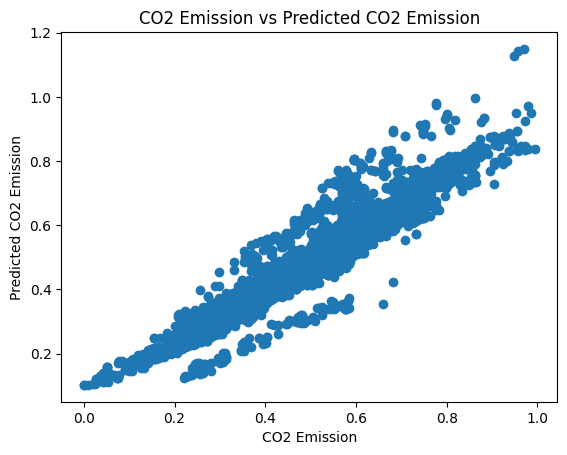

In [42]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_train, y_pred)
plt.xlabel("CO2 Emission")
plt.ylabel("Predicted CO2 Emission")
plt.title("CO2 Emission vs Predicted CO2 Emission")
plt.show()

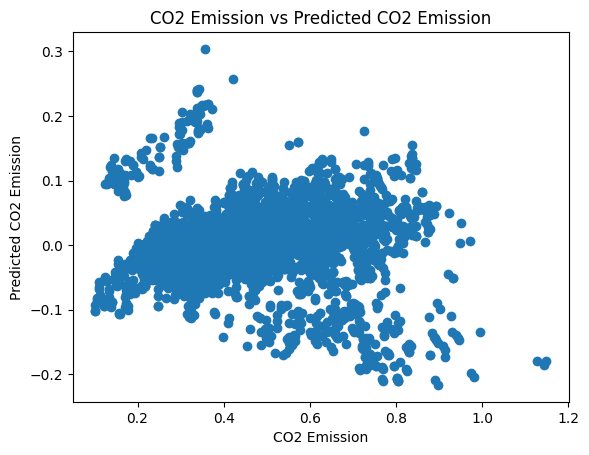

In [43]:
# Checking residuals
plt.scatter(y_pred,y_train-y_pred)
plt.xlabel("CO2 Emission")
plt.ylabel("Predicted CO2 Emission")
plt.title("CO2 Emission vs Predicted CO2 Emission")
plt.show()

There is no pattern visible in this plot and values are distributed equally around zero. So Linearity assumption is satisfied

/tmp/ipykernel_49469/3326403628.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train-y_pred)


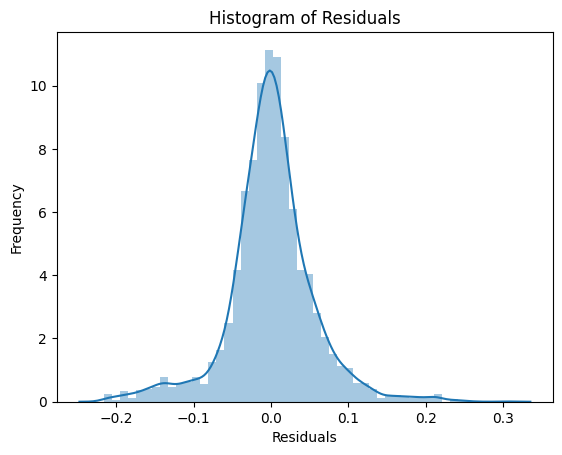

In [44]:
# Checking Normality of errors
sns.distplot(y_train-y_pred)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

Here the residuals are normally distributed. So normality assumption is satisfied

#### For test data

In [45]:
# Predicting Test data with the model
y_test_pred = lm.predict(X_test)

In [46]:
# Model Evaluation
acc_linreg = metrics.r2_score(y_test, y_test_pred)
print('R^2:', acc_linreg)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

R^2: 0.8900219081605801
Adjusted R^2: 0.88960890030496
MAE: 0.039097702319614416
MSE: 0.003267228626301776
RMSE: 0.05715967657625239


Here the model evaluations scores are almost matching with that of train data. So the model is not overfitting.

# Random Forest Regressor 

#### Train the model

In [47]:
# Import Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest Regressor
reg = RandomForestRegressor()

# Train the model using the training sets 
reg.fit(X_train, y_train)

RandomForestRegressor()

### Model Evaluation

In [48]:
# Model prediction on train data
y_pred = reg.predict(X_train)

In [49]:
# Model Evaluation
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2: 0.9985689999398167
Adjusted R^2: 0.9985667024626559
MAE: 0.004366612888201464
MSE: 4.2148749722266545e-05
RMSE: 0.006492206845308192


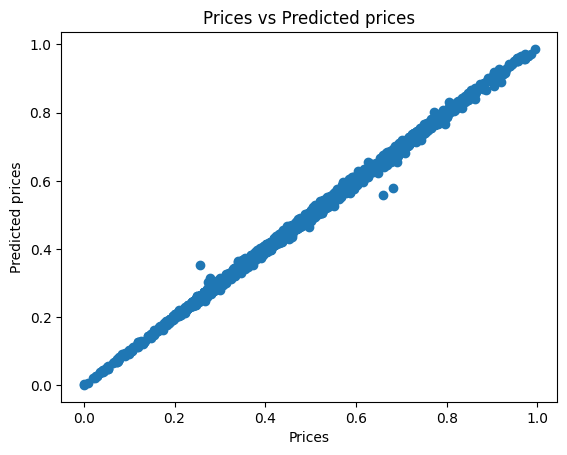

In [50]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_train, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

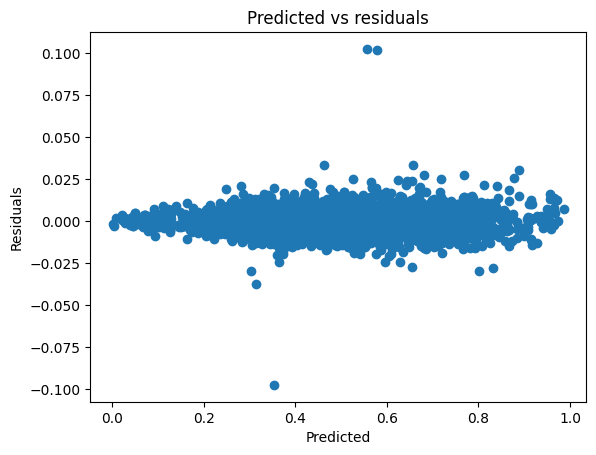

In [51]:
# Checking residuals
plt.scatter(y_pred,y_train-y_pred)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

#### For test data

In [52]:
# Predicting Test data with the model
y_test_pred = reg.predict(X_test)

In [53]:
# Model Evaluation
acc_rf = metrics.r2_score(y_test, y_test_pred)
print('R^2:', acc_rf)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

R^2: 0.9887541319994511
Adjusted R^2: 0.9887118996625391
MAE: 0.010463114000592055
MSE: 0.00033409219276738346
RMSE: 0.018278188990361804


# XGBoost Regressor

#### Training the model

In [54]:
# Import XGBoost Regressor
from xgboost import XGBRegressor

#Create a XGBoost Regressor
reg = XGBRegressor()

# Train the model using the training sets 
reg.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [55]:
#Save the XGBoost as a pickle file
import pickle
# Save the model as a pickle file
with open('xgboost_model.pkl', 'wb') as f:
    pickle.dump(reg, f)

max_depth (int) – Maximum tree depth for base learners.

learning_rate (float) – Boosting learning rate (xgb’s “eta”)

n_estimators (int) – Number of boosted trees to fit.

gamma (float) – Minimum loss reduction required to make a further partition on a leaf node of the tree.

min_child_weight (int) – Minimum sum of instance weight(hessian) needed in a child.

subsample (float) – Subsample ratio of the training instance.

colsample_bytree (float) – Subsample ratio of columns when constructing each tree.

objective (string or callable) – Specify the learning task and the corresponding learning objective or a custom objective function to be used (see note below).

nthread (int) – Number of parallel threads used to run xgboost. (Deprecated, please use n_jobs)

scale_pos_weight (float) – Balancing of positive and negative weights.


### Model Evaluation

In [56]:
# Model prediction on train data
y_pred = reg.predict(X_train)

In [57]:
# Model Evaluation
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2: 0.9982456445768384
Adjusted R^2: 0.998242827951159
MAE: 0.005475393287819155
MSE: 5.167287529343079e-05
RMSE: 0.0071883847485670095


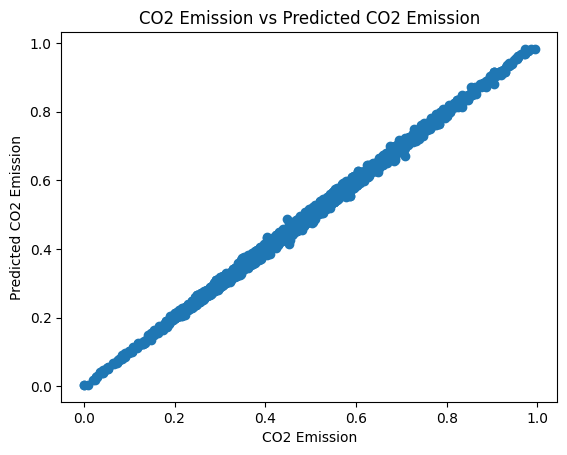

In [58]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_train, y_pred)
plt.xlabel("CO2 Emission")
plt.ylabel("Predicted CO2 Emission")
plt.title("CO2 Emission vs Predicted CO2 Emission")
plt.show()

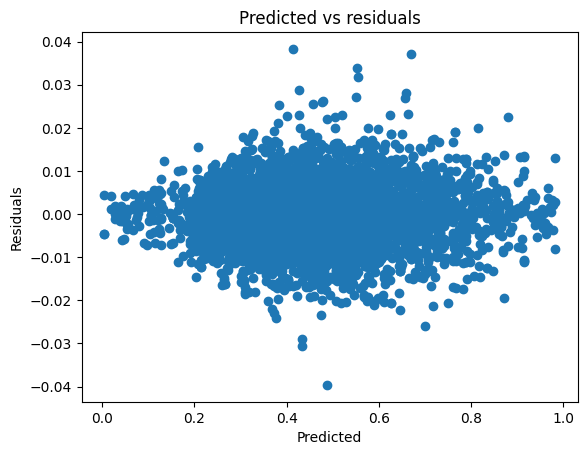

In [59]:
# Checking residuals
plt.scatter(y_pred,y_train-y_pred)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

#### For test data

In [60]:
#Predicting Test data with the model
y_test_pred = reg.predict(X_test)

In [61]:
# Model Evaluation
acc_xgb = metrics.r2_score(y_test, y_test_pred)
print('R^2:', acc_xgb)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

R^2: 0.990689799955694
Adjusted R^2: 0.9906548367581026
MAE: 0.00951263013559517
MSE: 0.0002765873783822988
RMSE: 0.01663091634223138


# SVM Regressor

In [62]:
# Creating scaled set to be used in model to improve our results
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#### Train the model

In [63]:
# Import SVM Regressor
from sklearn import svm

# Create a SVM Regressor
reg = svm.SVR()

In [64]:
# Train the model using the training sets 
reg.fit(X_train, y_train)

SVR()

C : float, optional (default=1.0): The penalty parameter of the error term. It controls the trade off between smooth decision boundary and classifying the training points correctly.

kernel : string, optional (default='rbf’): kernel parameters selects the type of hyperplane used to separate the data. It must be one of 'linear', 'poly', 'rbf', 'sigmoid', 'precomputed’ or a callable.

degree : int, optional (default=3): Degree of the polynomial kernel function (‘poly’). Ignored by all other kernels.

gamma : float, optional (default='auto’): It is for non linear hyperplanes. The higher the gamma value it tries to exactly fit the training data set. Current default is 'auto' which uses 1 / n_features.

coef0 : float, optional (default=0.0): Independent term in kernel function. It is only significant in 'poly' and 'sigmoid'.

shrinking : boolean, optional (default=True): Whether to use the shrinking heuristic.

#### Model Evaluation

In [65]:
# Model prediction on train data
y_pred = reg.predict(X_train)

In [66]:
# Model Evaluation
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2: 0.9405309480604804
Adjusted R^2: 0.9404354702247977
MAE: 0.03316255072567465
MSE: 0.0017516045290020999
RMSE: 0.04185217472249321


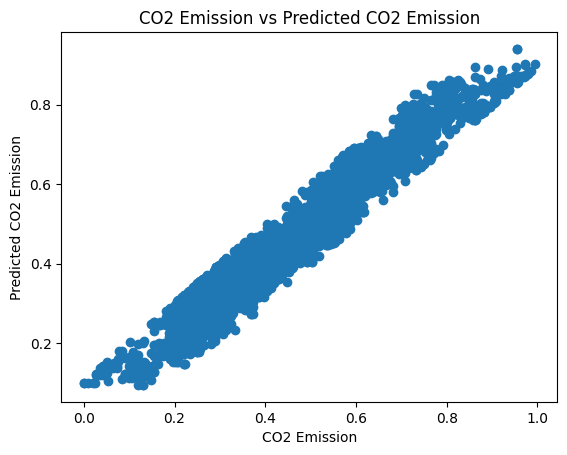

In [67]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_train, y_pred)
plt.xlabel("CO2 Emission")
plt.ylabel("Predicted CO2 Emission")
plt.title("CO2 Emission vs Predicted CO2 Emission")
plt.show()

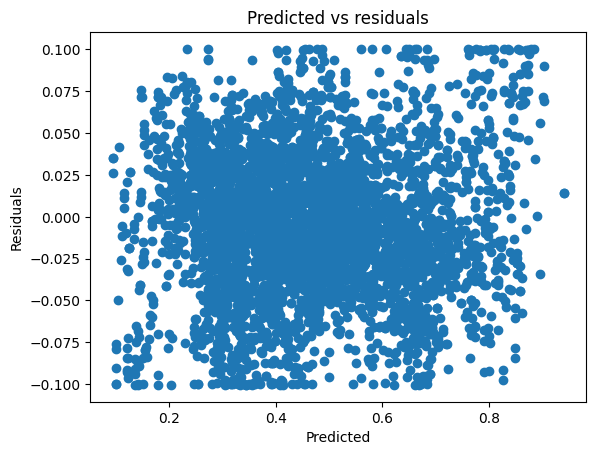

In [68]:
# Checking residuals
plt.scatter(y_pred,y_train-y_pred)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

#### For test data

In [69]:
# Predicting Test data with the model
y_test_pred = reg.predict(X_test)

In [70]:
# Model Evaluation
acc_svm = metrics.r2_score(y_test, y_test_pred)
print('R^2:', acc_svm)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

R^2: 0.9396274583633373
Adjusted R^2: 0.9394007374451738
MAE: 0.03270292039814556
MSE: 0.0017935471781589777
RMSE: 0.042350291358607885


# Evaluation and comparison of all the models

In [71]:
models = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'XGBoost', 'Support Vector Machines'],
    'R-squared Score': [acc_linreg*100, acc_rf*100, acc_xgb*100, acc_svm*100]})
models.sort_values(by='R-squared Score', ascending=False)

,Model,R-squared Score
2,XGBoost,99.068980
1,Random Forest,98.875413
3,Support Vector Machines,93.962746
0,Linear Regression,89.002191


### Hence XGBoost Regression works the best for this dataset.****

# Hyperparameter tunning on XGBoost

In [72]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_regression

# Generate a sample dataset (replace this with your own dataset)
X, y = make_regression(n_samples=1000, n_features=10, noise=0.1)

# Define your XGBoost regressor
xgb_model = xgb.XGBRegressor()

# Define the grid of hyperparameters to search
param_grid = {
    'learning_rate': [0.1, 0.01, 0.001],
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 300, 500],
    # Add more hyperparameters to tune...
}

# Perform Grid Search Cross-Validation to find the best hyperparameters
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# Display the best hyperparameters found
print("Best Hyperparameters:", grid_search.best_params_)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 500}


# Evaluate the model after Hyperparameter tunning

In [73]:
# Define your XGBoost regressor with the best hyperparameters
best_params = {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 500}
xgb_model = xgb.XGBRegressor(**best_params)

# Train the XGBoost model with the optimized hyperparameters
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=500, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [74]:
# Model prediction on train data
y_pred = xgb_model.predict(X_train)

In [75]:
# Model Evaluation
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2: 0.9980194961402832
Adjusted R^2: 0.9980163164322515
MAE: 0.005802349212594359
MSE: 5.833386303037467e-05
RMSE: 0.00763766083499226


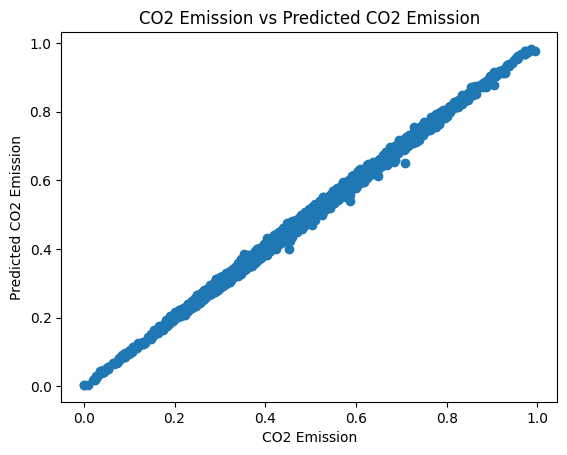

In [76]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_train, y_pred)
plt.xlabel("CO2 Emission")
plt.ylabel("Predicted CO2 Emission")
plt.title("CO2 Emission vs Predicted CO2 Emission")
plt.show()

### Metrics Before Hyperparameter Tuning:
    R^2 (Coefficient of Determination): 0.9982456445768384
    Adjusted R^2: 0.998242827951159
    MAE (Mean Absolute Error): 0.005475393287819155
    MSE (Mean Squared Error): 5.167287529343079e-05
    RMSE (Root Mean Squared Error): 0.0071883847485670095
### Metrics After Hyperparameter Tuning:
    R^2: 0.9980194961402832
    Adjusted R^2: 0.9980163164322515
    MAE: 0.005802349212594359
    MSE: 5.833386303037467e-05
    RMSE: 0.00763766083499226


### In machine learning, while comparing models, it's crucial to consider multiple evaluation metrics, not just one. Also, smaller differences in evaluation metrics might not necessarily indicate a significantly better or worse model. Here's an analysis based on the provided evaluation metrics:


## Conclusion:
Based on these metrics, the model before hyperparameter tuning seems slightly better than the model after tuning. However, the differences are quite subtle, and in practical scenarios, such small changes might not significantly impact model performance. Consider factors like computational efficiency, interpretability, and business needs when choosing between closely performing models.

